__Grids__

In this example, we'll create grids of Cartesian (y,x) coordinates, representing the arc-second coordinate grid of an observed data-set (e.g. imaging).

In [4]:
import autolens as al
import autolens.plot as aplt
%matplotlib inline

In PyAutoLens, a grid is a set of two-dimensional (y,x) coordinates (in arc-seconds) that are deflected and traced by a strong lensing system.

This coordinate grid is aligned with the image we analyze, such that each coordinate on a  grid maps to the centre of each image-pixel. Lets make a grid using 100 x 100 pixels, with a pixel scale (arcsecond-to-pixel conversion factor) of 0.05", giving us a a 5" x 5" grid.

In [2]:
grid = al.grid.uniform(
    shape_2d=(100, 100), pixel_scales=0.05
)

First, lets plot this grid, which shows that it is a fairly bland uniform grid of dots.

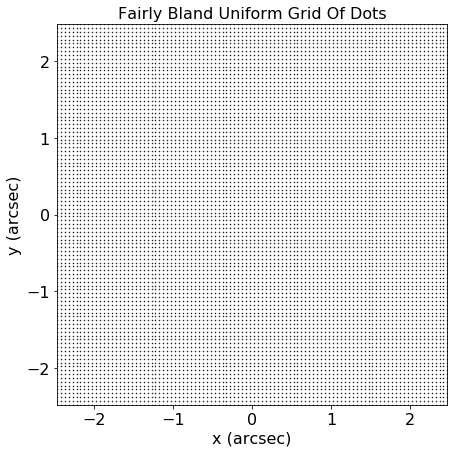

In [6]:
plotter = aplt.Plotter(
    labels=aplt.Labels(title="Fairly Bland Uniform Grid Of Dots")
)

aplt.grid(grid=grid, plotter=plotter)

We can print each coordinate of this grid, revealing that it consists of a set of arc-second coordinates (where the spacing between each coordinate corresponds to the 'pixel_scales' of 0.05" defined above)

In [5]:
print("(y,x) pixel 0:")
print(grid.in_2d[0,0])
print("(y,x) pixel 1:")
print(grid.in_2d[0,1])
print("(y,x) pixel 2:")
print(grid.in_2d[0,2])
print("(y,x) pixel 100:")
print(grid.in_2d[1,0])
print("etc.")

(y,x) pixel 0:
[ 2.475 -2.475]
(y,x) pixel 1:
[ 2.475 -2.425]
(y,x) pixel 2:
[ 2.475 -2.375]
(y,x) pixel 100:
[ 2.425 -2.475]
etc.


Grids in PyAutoLens are stored as both 1D and 2D NumPy arrays, because different calculations benefit from us using the array in different formats. We can access both the 1D and 2D arrays automatically by specifying the input as a 1D or 2D.

In [11]:
print("(y,x) pixel 0 (accessed in 2D):")
print(grid.in_2d[0,0])
print("(y,x) pixel 0 (accessed in 1D):")
print(grid.in_1d[0])

(y,x) pixel 0 (accessed in 2D):
[ 2.475 -2.475]
(y,x) pixel 0 (accessed in 1D):
[ 2.475 -2.475]


The shape of the grid is also available in 1D and 2D, consisting of 10000 (100 x 100) coordinates.

In [12]:
print(grid.shape_2d)
print(grid.shape_1d)

(100, 100)
10000


We can print the entire grid in either 1D or 2D. 

In [19]:
print(grid.in_2d)
print(grid.in_1d)

[[[ 2.4875 -2.4875]
  [ 2.4875 -2.4625]
  [ 2.4875 -2.4375]
  ...
  [ 2.4875  2.4375]
  [ 2.4875  2.4625]
  [ 2.4875  2.4875]]

 [[ 2.4625 -2.4875]
  [ 2.4625 -2.4625]
  [ 2.4625 -2.4375]
  ...
  [ 2.4625  2.4375]
  [ 2.4625  2.4625]
  [ 2.4625  2.4875]]

 [[ 2.4375 -2.4875]
  [ 2.4375 -2.4625]
  [ 2.4375 -2.4375]
  ...
  [ 2.4375  2.4375]
  [ 2.4375  2.4625]
  [ 2.4375  2.4875]]

 ...

 [[-2.4375 -2.4875]
  [-2.4375 -2.4625]
  [-2.4375 -2.4375]
  ...
  [-2.4375  2.4375]
  [-2.4375  2.4625]
  [-2.4375  2.4875]]

 [[-2.4625 -2.4875]
  [-2.4625 -2.4625]
  [-2.4625 -2.4375]
  ...
  [-2.4625  2.4375]
  [-2.4625  2.4625]
  [-2.4625  2.4875]]

 [[-2.4875 -2.4875]
  [-2.4875 -2.4625]
  [-2.4875 -2.4375]
  ...
  [-2.4875  2.4375]
  [-2.4875  2.4625]
  [-2.4875  2.4875]]]
[[ 2.4875 -2.4875]
 [ 2.4875 -2.4625]
 [ 2.4625 -2.4875]
 ...
 [-2.4625  2.4875]
 [-2.4875  2.4625]
 [-2.4875  2.4875]]


NameError: name 'plt' is not defined

A grid can also have a sub-grid, which splits each pixel on the grid into sub-pixels of size (sub_size x sub_size). These additional pixels are used to perform calculations more accurately.

In [14]:
grid = al.grid.uniform(shape_2d=(100, 100), pixel_scales=0.05, sub_size=2)

We specified a sub_size of 2 above, therefore we expect 4 (2 x 2) times more sub-pixels than pixels. We can see this is the case by inspecting the grid sub_shape attributes.

In [15]:
print(grid.sub_shape_1d)
print(grid.sub_shape_2d)

40000
(200, 200)


The first four pixels of our sub-grid correspond to the first four sub-pixels, which form a sub-grid inside the
first grid pixel, as follows:

In [ ]:
# pixel 1:
#              _________
#              |         |
#              |         |  o = (y,x) centre of 
# y = 2.475"   |    o    |       grid coordinate.
#              |         |
#              |_________|
#              x = -2.475

# Sub-pixels 1, 2, 3 & 4:
#               _________
#              |         |
#              |  o   o  |  o = (y,x) centre of sub-
# y = 2.475"   |         |       grid coordinates.
#              |  o   o  |
#              |_________|
#              x = -2.475

# The sub-pixels coordinate are spaced uniformly between the pixel's edges
# (which are at y = (2.45", 2.5") and x = (-2.5". -2.45") )

By default, a grid is stored in 1D, and we can access its elements without specifying 'in_1d'

In [16]:
print("(y,x) sub-pixel 0 (of pixel 0):")
print(grid[0])
print("(y,x) sub-pixel 1 (of pixel 0):")
print(grid[1])
print("(y,x) sub-pixel 2 (of pixel 0):")
print(grid[2])
print("(y,x) sub-pixel 3 (of pixel 0):")
print(grid[3])

(y,x) sub-pixel 0 (of pixel 0):
[ 2.4875 -2.4875]
(y,x) sub-pixel 1 (of pixel 0):
[ 2.4875 -2.4625]
(y,x) sub-pixel 2 (of pixel 0):
[ 2.4625 -2.4875]
(y,x) sub-pixel 3 (of pixel 0):
[ 2.4625 -2.4625]


The sub-grid then continues on to the next grid pixels (and so on)

In [17]:
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid[4])
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid[5])
print("etc.")

(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4375]
(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4125]
etc.


We can again access these coordinates in 2D.

In [18]:
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid.in_2d[0, 2])
print("(y,x) sub-pixel 1 (of pixel 1):")
print(grid.in_2d[0, 3])
print("etc.")

(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4375]
(y,x) sub-pixel 1 (of pixel 1):
[ 2.4875 -2.4125]
etc.


Congratulations, you've completed your first PyAutoLens tutorial! Before moving on to the next one, experiment with PyAutoLens by doing the following:

1) Change the pixel-scale of the grids - what happens to the Cartesian coordinates?
2) Change the resolution of the grids - what happens Cartesian coordinates?
3) Change the sub-grid size - what do you note about the pixel-scale of sub pixels?

In [20]:
grid1 = al.grid.uniform(
    shape_2d=(100, 100), pixel_scales=0.1
)

In [22]:
grid1[2]

Grid([ 4.95, -4.75])

In [23]:
grid2 = al.grid.uniform(
    shape_2d=(200, 200), pixel_scales=0.05
)

In [28]:
grid2[0]

Grid([ 4.975, -4.975])

In [29]:
grid1[0]

Grid([ 4.95, -4.95])